<img src="Bilder/Aufwand/MIREVIBanner.jpg">

# Aufwand

Bemerkung: Die folgenden Ausführungen sind eine automatische Übersetzung von deepl (https://www.deepl.com/translator) der Webseite Problem Solving with Algorithms and Data Structures Using Python (https://runestone.academy/runestone/books/published/pythonds/index.html). Es wurde zum Teil nur in geringem Maße modifiziert bzw. wird ständig verbessert, daher sind einige Formulierungen und Darstellungen noch etwas "seltsam". Eigene Ergänzungen sind bereits zum Teil erfolgt.

<img src="Bilder/Aufwand/AufwandTitelbild.jpg">

## Ziele dieser Lehreinheit

1. Verstehen, warum Algorithmusanalyse wichtig ist.
2. Beispiele zu MAXSUM, Anagramm verstehen
3. "Groß-O"-Notation zur Beschreibung der Laufzeit verwenden können.
4. "Groß-O"-Notation als Beschreibung üblicher Operationen auf Python-Listen und -Wörterbüchern verstehen.
5. Verstehen, wie sich die Implementierung von Datenstrukturen auf die Algorithmusanalyse auswirkt.
6. Verstehen, wie man einfache Python-Programme einem Benchmarking unterzieht.

## Motivation 

---
### Wenn zwei Programme dasselbe Problem lösen, aber unterschiedlich aussehen, ist dann das eine Programm besser als das andere?
---

Es ist typisch, dass man als angehender Informatiker Programme miteinander vergleichen muss. Sie haben vielleicht auch bemerkt, dass es üblich ist, dass Computerprogramme sehr ähnlich aussehen, besonders die einfachen. Eine interessante Frage stellt sich oft: *Wenn zwei Programme dasselbe Problem lösen, aber unterschiedlich aussehen, ist dann das eine Programm besser als das andere?*

Um diese Frage zu beantworten, müssen wir daran denken, dass es einen wichtigen Unterschied zwischen einem Programm und dem zugrunde liegenden Algorithmus gibt, den das Programm darstellt. Wie wir bereits dargelegt haben, ist ein Algorithmus eine generische, schrittweise Liste von Anweisungen zur Lösung eines Problems. Es handelt sich um eine Methode zum Lösen eines beliebigen Problems, so dass der Algorithmus bei einer bestimmten Eingabe das gewünschte Ergebnis liefert. Ein Programm hingegen ist ein Algorithmus, der in einer Programmiersprache kodiert wurde. Es kann viele Programme für denselben Algorithmus geben, abhängig vom Programmierer und der verwendeten Programmiersprache.

Um diesen Unterschied weiter zu untersuchen, betrachten Sie die folgende gezeigte Funktion <code>sumOfN()</code>. Diese Funktion löst ein bekanntes Problem, indem sie die Summe der ersten n ganzen Zahlen berechnet. Der Algorithmus verwendet die Idee einer Akkumulatorvariablen, die mit 0 initialisiert wird. Die Lösung iteriert dann durch die n ganzen Zahlen und addiert jede einzelne zum Akkumulator.

In [4]:
def sumOfN(n):
   theSum = 0
   for i in range(1,n+1):
       theSum = theSum + i
   return theSum

print("Ergebnis ist",sumOfN(17))

Ergebnis ist 153


---
### Algorithmen unterscheiden sich bzgl Effizienz, Verständlichkeit, Eleganz,...

---

Sehen Sie sich nun die Funktion <code>foo(tom)</code> an. Auf den ersten Blick mag es merkwürdig aussehen, aber bei näherer Betrachtung können Sie sehen, dass diese Funktion im Wesentlichen dasselbe tut wie die vorherige. Der Grund dafür, dass dies nicht offensichtlich ist, ist eine schlechte Codierung. Wir haben keine guten Identifizierungsnamen verwendet, um die Lesbarkeit zu verbessern, und wir haben während des Akkumulationsschritts eine zusätzliche Zuweisungsanweisung verwendet, die nicht wirklich notwendig war.

In [5]:
def foo(tom):
    fred = 0
    for bill in range(1,tom+1):
       barney = bill
       fred = fred + barney

    return fred

print("Ergebnis ist",foo(16))

Ergebnis ist 136


Die Frage, die wir vorhin gestellt haben, lautete, ob eine Funktion besser ist als eine andere. Die Antwort hängt von Ihren Kriterien ab. Die Funktion <code>sumOfN</code> ist sicherlich besser als die Funktion <code>foo</code>, wenn es Ihnen um die Lesbarkeit geht. Tatsächlich haben Sie in Ihrem Einführungskurs in die Programmierung wahrscheinlich viele Beispiele dafür gesehen, da eines der Ziele darin besteht, Ihnen dabei zu helfen, Programme zu schreiben, die leicht zu lesen und leicht zu verstehen sind. In diesem Kurs sind wir aber auch daran interessiert, den Algorithmus selbst zu charakterisieren. (Wir hoffen natürlich, dass Sie sich auch weiterhin bemühen werden, lesbaren, verständlichen Code zu schreiben).

## Kostenmaße - wie misst man den Aufwand?
Bei der Algorithmusanalyse geht es um den Vergleich von Algorithmen auf der Grundlage der Menge an Rechenressourcen, die jeder Algorithmus verbraucht. Wir möchten in der Lage sein, zwei Algorithmen in Betracht zu ziehen und sagen, dass einer besser als der andere ist, weil er diese Ressourcen effizienter nutzt oder weil er vielleicht einfach weniger verbraucht. Aus dieser Perspektive erscheinen die beiden obigen Funktionen sehr ähnlich. Beide verwenden im Wesentlichen den gleichen Algorithmus zur Lösung des Summenproblems.

---
### Ressourcenverbrauch eines Algorithmus variiert mit der Länge der Eingabe und zeigt sich in verbrauchter Zeit und benötigtem Speicherplatz
---

An diesem Punkt ist es wichtig, mehr darüber nachzudenken, was wir wirklich unter Rechenressourcen verstehen. Es gibt zwei verschiedene Arten, dies zu betrachten. Eine Möglichkeit besteht darin, die Menge an Platz oder Speicherplatz zu betrachten, die ein Algorithmus zur Lösung des Problems benötigt. Die Menge an Speicherplatz, die für eine Problemlösung benötigt wird, wird normalerweise von der Probleminstanz selbst diktiert. Von Zeit zu Zeit gibt es jedoch Algorithmen, die einen sehr spezifischen Platzbedarf haben, und in diesen Fällen werden wir sehr sorgfältig darauf achten, die Varianten zu erklären.

### Laufzeit in Pythonprogrammen praktisch durch <code>time</code> berechnen
Als Alternative zum *Platzbedarf* können wir Algorithmen auf der Grundlage des *Zeitverbrauchs*, die sie zur Ausführung benötigen, analysieren und vergleichen. Dieses Maß wird manchmal auch als Ausführungszeit oder **Laufzeit** des Algorithmus bezeichnet. Eine Möglichkeit, die Laufzeit für den Algorithmus <code>sumOfN</code> zu messen, besteht darin, eine Benchmark-Analyse durchzuführen. Das bedeutet, dass wir die tatsächliche Zeit verfolgen, die das Programm benötigt, um sein Ergebnis zu berechnen. In Python können wir einen Benchmark einer Funktion durchführen, indem wir die *Start- und Endzeit* in Bezug auf das von uns verwendete System notieren. 

---
### Realer Zeitaufwand in einem Pythonprogramm kann durch die Module <code>time</code> und <code>timeit</code> implementiert werden. Der Zeitverbrauch hängt jedoch von vielen Faktoren ab. 
---

Im Modul <code>time</code> gibt es eine Funktion namens <code>time()</code>, die die aktuelle Systemuhrzeit in Sekunden seit einem beliebigen Startpunkt zurückgibt. Indem wir diese Funktion zweimal aufrufen, am Anfang und am Ende, und dann die Differenz berechnen, können wir eine genaue Anzahl von Sekunden (in den meisten Fällen Bruchteile) für die Ausführung erhalten.

In [6]:
import time

def sumOfN2(n):
   start = time.time()

   theSum = 0
   for i in range(1,n+1):
      theSum = theSum + i

   end = time.time()

   return theSum,end-start

#for i in range(5):
print ("Sum is %d required %10.7f seconds",sumOfN2(1000))
# required %10.7f seconds

#for i in range(5):
print("Sum is %d required %10.7f seconds"%sumOfN2(10000))
# required %10.7f seconds
    
#for i in range(5):
print("Sum is %d required %10.7f seconds"%sumOfN2(100000))
#required %10.7f seconds
    
#for i in range(5):
print("Sum is %d required %10.7f seconds"%sumOfN2(1000000))
#required %10.7f seconds

Sum is %d required %10.7f seconds (500500, 9.274482727050781e-05)
Sum is 50005000 required  0.0010562 seconds
Sum is 5000050000 required  0.0127153 seconds
Sum is 500000500000 required  0.0858033 seconds


Man erkennt, dass die Zeit von der Eingabegröße abhängt und relativ konstant ist. In diesem Fall stellt sich wiederum heraus, dass der Durchschnitt etwa zehnmal so hoch ist wie der vorherige.

Betrachten Sie nun den folgenden Algorithmus, der eine andere Möglichkeit zur Lösung des Summenproblems aufzeigt. Diese Funktion macht sich den Zusammenhang $\sum\limits_{i=0}^{n}i=\frac{n(n+1)}{2}$ zunutze, um die Summe der ersten n ganzen Zahlen ohne Iteration zu berechnen.

In [7]:
import time

def sumOfN3(n):
   start = time.time()

   theSum = (n*(n+1))/2

   end = time.time()

   return theSum,end-start

print (sumOfN3(1000))
print (sumOfN3(10000))

for i in range(5):
       print("Sum is %d required %10.7f seconds"%sumOfN3(10000))
        
for i in range(5):
       print("Sum is %d required %10.7f seconds"%sumOfN3(100000))
        
for i in range(5):
       print("Sum is %d required %10.7f seconds"%sumOfN3(1000000))

(500500.0, 1.1920928955078125e-06)
(50005000.0, 1.430511474609375e-06)
Sum is 50005000 required  0.0000010 seconds
Sum is 50005000 required  0.0000007 seconds
Sum is 50005000 required  0.0000005 seconds
Sum is 50005000 required  0.0000005 seconds
Sum is 50005000 required  0.0000010 seconds
Sum is 5000050000 required  0.0000014 seconds
Sum is 5000050000 required  0.0000012 seconds
Sum is 5000050000 required  0.0000012 seconds
Sum is 5000050000 required  0.0000010 seconds
Sum is 5000050000 required  0.0000012 seconds
Sum is 500000500000 required  0.0000014 seconds
Sum is 500000500000 required  0.0000019 seconds
Sum is 500000500000 required  0.0000012 seconds
Sum is 500000500000 required  0.0000012 seconds
Sum is 500000500000 required  0.0000007 seconds


Es gibt zwei wichtige Dinge, die bei dieser Ausgabe zu beachten sind. Erstens sind die oben aufgezeichneten Zeiten kürzer als alle vorherigen Beispiele. Zweitens sind sie konstant, egal wie hoch der Wert von $n$ ist. Es scheint, dass der obige Algorithmus kaum durch die Anzahl der hinzugefügten ganzen Zahlen beeinflusst wird.

---
### Ein Algorithmus mit konstanter Laufzeit ändert sich nicht bzw. nur wenig bei unterschiedlichen Eingabegrößen. 
---

<!-- [MIREVI] -->
Es gibt jedoch ein Problem mit der einfachen Nutzung des Moduls <code>time</code>. Diese Form der Zeitmessung ist sehr einfach, da man nur im Programmcode die aktuelle Zeit speichert und die Differenz berechnen muss. Neben der aktuellen Laufzeit des Programms sind jedoch auf dem Rechner auch noch andere Prozesse tätig, die je nach Situation mehr oder weniger zum Endergebnis beitragen, z. B. auch der Garbage Collector innerhalb von Python. Besser wäre es, wenn man alle Hintergrundprozesse abschalten könnte oder zumindest den zu messenden Code mehrfach ausführt und dann die Ergebnisse statistisch mittelt.

Dies wird durch das Modul <code>timeit</code> in Python realisiert, eine Erläuterung findet man [hier](https://docs.python.org/3/library/timeit.html). 


<!-- [MIREVI] -->
### Laufzeit mit <code>timeit</code> in Python berechnen
Referenz: [Laufzeitmessung mit <code>timeit</code>](http://jupiter-online.net/python-laufzeit-messen-mit-timeit/)

<code>timeit</code> ist die bessere Lösung, da dieses Modul speziell für Laufzeitmessungen entwickelt wurde. Es ist sowohl eine Eingabe über die Konsole möglich als auch eine Nutzung direkt im Programmcode. Der zu testetende Code muss jedoch als Parameterstring übergeben werden. Die o.g. Referenz nutzt als Beispiel die Fakultätsfunktion und vergleicht ein eigenes Codebeispiel mit der mathematischen Funktion <code>factorial</code>.

---
###  <code>timeit</code> ist für Python die beste Möglichkeit für einfache Zeitmessung. 
---



In [8]:
import timeit
# übernommen von http://jupiter-online.net/python-laufzeit-messen-mit-timeit/
 
def fakultaet(num):
    '''Funktion zur Berechnung der Fakultät'''
 
    # Negative Werte sind nicht definiert
    if num < 0:
        return 'Fehler fakultaet({}) nicht definiert'.format(num)
    # 0! = 1
    if num == 0:
        return 1
    # num! berechnen
    val = 1
    for i in range(1, num+1):
        val *= i
    return val

print("fakultaet(10000) hat {} Stellen".format(len(str(fakultaet(10000)))))
#print("fakultaet(10000) =",fakultaet(10000))


fakultaet(10000) hat 35660 Stellen


Aufgrund der hohen Zahlen bei der Berechnung von Fakultäten geben wir für unseren ersten Test nur die Anzahl der Stellen aus. Um <code>timeit</code> innerhalb von Skripten zu verwenden, muss der zu messende Code als String übergeben werden. Wir erstellen eine Kopie unserer Funktion und definieren sie als String namens TEST_FAKULTAET. Nun können wir unseren Laufzeitvergleich durchführen:

In [11]:
# übernommen von http://jupiter-online.net/python-laufzeit-messen-mit-timeit/

TEST_FAKULTAET = '''
def fakultaet(num):
 
    # Negative Werte sind nicht definiert
    if num < 0:
        return 'Fehler fakultaet({}) nicht definiert'.format(num)
    # 0! = 1
    if num == 0:
        return 1
    # num! berechnen
    val = 1
    for i in range(1, num+1):
        val *= i
    return val
 
fakultaet(10000)
'''
 
# timeit direkt verwenden
print(timeit.timeit(TEST_FAKULTAET, number=1))
print(timeit.timeit('math.factorial(10000)', setup='import math', number=1))

0.045147128868848085
0.005522976629436016


<!--- übernommen von http://jupiter-online.net/python-laufzeit-messen-mit-timeit/ --->
Die Messung ergibt, dass unsere Implementierung nicht besonders geglückt ist. Die Funktion <code>factorial()</code> aus dem math Modul ist deutlich schneller in der Ausführung.

Anstatt <code>timeit</code> direkt auszuführen, können wir auch die <code>Timer</code>-Klasse verwenden. Wir speichern die auszuführenden Berechnungen in den Objekten TIME1 und TIME2. Anschließend führen wir <code>timeit()</code> und <code>repeat()</code> auf diese Objekte aus. Im ersten Fall legen wir die Anzahl an Schleifendurchläufen fest, im zweiten Fall definieren wir auch die Wiederholungen für die Zeitmessung.

In [12]:
# timeit über die Timer Klasse verwenden
TIME1 = timeit.Timer(TEST_FAKULTAET)
TIME2 = timeit.Timer('math.factorial(10000)', setup='import math')
 
# timeit auf Timerobjekt anwenden
print(TIME1.timeit(number=1))
print(TIME2.timeit(number=1))
 
# repeat auf Timerobjekt anwenden
print(TIME1.repeat(repeat=3, number=1))
print(TIME2.repeat(repeat=3, number=1))

0.03633147105574608
0.005470420233905315
[0.03666743077337742, 0.06197740696370602, 0.0364876170642674]
[0.02742030518129468, 0.007078487891703844, 0.005787720903754234]


In [13]:
###

### Laufzeit in Programmen durch Schritte berechnen und grafisch anzeigen
Aber was sagt uns dieser Benchmark wirklich? Intuitiv können wir sehen, dass die iterativen Lösungen mehr Arbeit zu leisten scheinen, da einige Programmschritte wiederholt werden. Dies ist wahrscheinlich der Grund dafür, dass es länger dauert. Auch scheint die Zeit, die für die iterative Lösung benötigt wird, zuzunehmen, da wir den Wert von n erhöhen. Es gibt jedoch ein Problem. Wenn wir die gleiche Funktion auf einem anderen Computer ausführen oder eine andere Programmiersprache verwenden würden, würden wir wahrscheinlich unterschiedliche Ergebnisse erhalten. Es könnte sogar noch länger dauern, <code>sumOfN3</code> auszuführen, wenn der Computer älter wäre.

Wir brauchen eine **bessere Methode** zur Charakterisierung dieser Algorithmen in Bezug auf die Ausführungszeit. Bei der Benchmark-Technik wird die tatsächliche Ausführungszeit berechnet. Sie liefert uns nicht wirklich eine brauchbare Messung, da sie von einer bestimmten Maschine, einem Programm, einer Tageszeit, einem Compiler und einer Programmiersprache abhängt. Stattdessen wünschen wir uns eine Charakterisierung, die unabhängig von dem verwendeten Programm oder Computer ist. Diese Messung wäre dann allein zur Beurteilung des Algorithmus nützlich und könnte zum Vergleich von Algorithmen verschiedener Implementierungen verwendet werden.

---
### Grafische Darstellung mit <code>matplotlib</code> ist schnell realisierbar.
---
Eine einfache Methode wäre es die *wichtigsten* Schritte in einem Programm zu zählen. Die Frage stellt sich dabei, was in einem Codeabschnitt ein *wichtiger* Schritt ist. Wir betrachten nochmal zwei Algorithmen aus der Veranstaltung zu Primzahlen, die beide das ***Sieb des Eratosthenes*** zur Berechnung der Primzahlen bis $n$ nutzen. Wir speichern die Anzahl der Schritte für verschiedene Werte für $n$ und nutzen die Bibliothek <code>mathplotlib</code> für die grafische Ausgabe. Informationen zum Befehl <code>plot</code> dazu findet man in der Dokumentation zu [matplotlib](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html)

Start...Berechnung und Plot Schritte für Algorithmen Primzahl2, Primzahl4_2
[1, 10, 100, 1000, 5000]
[0, 5, 146, 2550, 16723]
[0, 5, 74, 831, 4330]


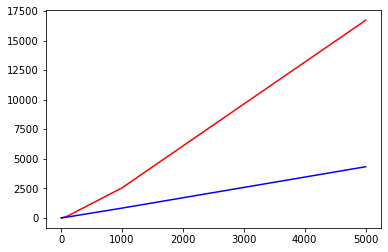

In [14]:
import math   ### wird benötigt für sqrt-Funktion
import matplotlib.pyplot as plt ### für grafische Darstellung

def Primzahlentabelle2(n):
    prim_list = [2]
    prim_list.extend([i for i in range(3, n+1)])

    steps = 0
    # wir zählen die Berechnung des Streichkandidaten im innersten Teil
    
    for i in range(2, int(math.sqrt(n)+1)):
        for k in range(i, int(n/i)+1):
            a = i*k
            steps +=1;# kritische Stelle für Laufzeit
            if a in prim_list:
                prim_list.remove(a)
                
    # gibt Primteiler und Schrittanzahl zurück
    return prim_list, steps


def Primzahlentabelle4_2(n):
    prim_list = [2]
    prim_list.extend([i for i in range(3, n+1)])
    
    steps = 0
    # wir zählen die Berechnung des Streichkandidaten im innersten Teil
    for i in range(2, int(math.sqrt(n)+1)):
        if i in prim_list:
            for k in range(int(n/i), i-1, -1):
                if k in prim_list:
                    a = i*k 
                    steps +=1;# kritische Stelle für Laufzeit
                    if a in prim_list:
                        prim_list.remove(a)
                        
    # gibt Primteiler und Schrittanzahl zurück            
    return prim_list, steps


print('Start...Berechnung und Plot Schritte für Algorithmen Primzahl2, Primzahl4_2')

x = []
y1 = []  #P2
y2 = []  #P4_2

for i in [1,10,100,1000,5000]:
    xwert = i
    ptabelle1, y1wert = Primzahlentabelle2(xwert)  
    ptabelle2, y2wert = Primzahlentabelle4_2(xwert)  
    x.append(xwert)
    y1.append(y1wert) 
    y2.append(y2wert)

print(x)
print(y1)
print(y2)

### Darstellung in einem Graphen
plt.plot(x, y1, 'r')
plt.plot(x, y2, 'b')
plt.show()


Man erkennt hier, dass der Algorithmus 2 (rote Kurve) mehr Schritte benötigt als Algorithmus 4_2 (blaue Kurve), beide aber linear mit steigender Eingabe wachsen. 
Die Berechnung ist unabhängig von der Leistungsfähigkeit des Rechners, da nur die Ausführung von Programmzeilen gezählt wird.

# Das Kostenmaß Landau-Notation ("Groß-Oh", O(n) )
Beim Versuch, die Effizienz eines Algorithmus in Bezug auf die Ausführungszeit unabhängig von einem bestimmten Programm oder Computer zu charakterisieren, ist es wichtig, die Anzahl der Operationen oder Schritte zu quantifizieren, die der Algorithmus benötigt. Wenn jeder dieser Schritte als eine Grundeinheit der Berechnung betrachtet wird, dann kann die Ausführungszeit für einen Algorithmus als die Anzahl der Schritte ausgedrückt werden, die zur Lösung des Problems erforderlich sind. Die Entscheidung für eine geeignete Basiseinheit der Berechnung kann ein kompliziertes Problem sein und hängt davon ab, wie der Algorithmus implementiert wird.

Wir betrachten im folgenden nochmal den Pythoncode für die Summenberechnung.

***Listing 4.3 - 1***  
```python
def sumOfN2(n):
   theSum = 0
   for i in range(1,n+1):
      theSum = theSum + i
   return theSum
```

Eine gute Grundrecheneinheit für den Vergleich der oben gezeigten Summierungsalgorithmen könnte darin bestehen, die Anzahl der ausgeführten Zuordnungsanweisungen zu zählen, um die Summe zu berechnen. In der Funktion <code>sumOfN</code> beträgt die Anzahl der Zuweisungsanweisungen 1 ( <code>theSum=0</code>) plus den Wert von $n$ (die Anzahl der von uns durchgeführten Zuweisungen <code>theSum=theSum+1</code>. Wir können dies durch eine Funktion, genannt $T$, bezeichnen, wobei $T(n)=1+n$. Der Parameter $n$ wird oft als *Größe des Problems* bezeichnet, und wir können dies als "T(n) ist die Zeit, die benötigt wird, um ein Problem der Größe n zu lösen, nämlich 1+n Schritte" lesen.

In den oben angegebenen Summierungsfunktionen ist es sinnvoll, die Anzahl der Terme in der Summierung zu verwenden, um die Größe des Problems zu bezeichnen. Man kann dann sagen, dass die Summe der ersten 100.000 ganzen Zahlen eine größere Instanz des Summenproblems ist als die Summe der ersten 1.000. Aus diesem Grund mag es vernünftig erscheinen, dass die zur Lösung des größeren Falles erforderliche Zeit größer ist als für den kleineren Fall. Unser Ziel ist es dann, zu zeigen, wie sich die Ausführungszeit des Algorithmus im Hinblick auf die Größe des Problems ändert.

Informatiker ziehen es vor, mit dieser Analysetechnik noch einen Schritt weiter zu gehen. Es stellt sich heraus, dass die genaue Anzahl der Operationen nicht so wichtig ist wie die Bestimmung des dominantesten Teils der Funktion $T(n)$. Mit anderen Worten, wenn das Problem größer wird, neigt ein Teil der Funktion $T(n)$ dazu, den Rest zu dominieren. Dieser dominante Begriff wird letztlich zum Vergleich herangezogen. Die Funktion der Größenordnung beschreibt den Teil von $T(n)$, der mit zunehmendem Wert von $n$ am schnellsten zunimmt. Die Größenordnung wird oft als "Groß-O"-Notation (für "Ordnung") bezeichnet und als $O(f(n))$ geschrieben. Man spricht auch von der **Landau-Notation**. Diese Notation bietet eine nützliche Annäherung an die tatsächliche Anzahl von Schritten in der Berechnung. Die Funktion $f(n)$ bietet eine einfache Darstellung des dominanten Teils des ursprünglichen $T(n)$.

Im obigen Beispiel ist $T(n)=1+n$. Wenn n groß wird, verliert die Konstante 1 für das Endergebnis immer mehr an Bedeutung. Wenn wir nach einer Näherung für $T(n)$ suchen, dann können wir die 1 weglassen und einfach sagen, dass die Laufzeit $O(n)$ ist. Es ist wichtig zu beachten, dass die 1 für $T(n)$ sicherlich von Bedeutung ist. Da $n$ jedoch groß wird, wird unsere Annäherung auch ohne sie hinreichend genau sein.

Als weiteres Beispiel nehmen wir an, dass für einen Algorithmus die genaue Anzahl der Schritte $T(n)=5n^{2}+27n+1005$ ist. Wenn $n$ klein ist, sagen wir 1 oder 2, scheint die Konstante 1005 der dominierende Teil der Funktion zu sein. Wenn $n$ jedoch größer wird, wird der Begriff n^{2} zum wichtigsten Teil. Wenn $n$ wirklich groß ist, werden die beiden anderen Begriffe in der Tat unbedeutend in der Rolle, die sie bei der Bestimmung des Endergebnisses spielen. Auch hier können wir, um uns $T(n)$ anzunähern, wenn $n$ groß wird, die anderen beiden Begriffe ignorieren und uns auf $5n^{2}$ konzentrieren. Darüber hinaus wird der Koeffizient 5 unbedeutend, wenn $n$ groß wird. Wir würden dann sagen, dass die Funktion $T(n)$ eine Größenordnung hat $f(n)=n^{2}$, oder einfach, dass es $O(n^{2})$ ist.

---
### Wir betrachten verschiedene Analyseformen: Worst Case, Best Case, Average Case. Meist wird der schlimmste Fall für die Laufzeit betrachtet.
---

Obwohl wir dies im Summenbeispiel nicht sehen, hängt die Leistung eines Algorithmus manchmal von den genauen Werten der Daten und nicht einfach von der Größe des Problems ab. Für diese Art von Algorithmen müssen wir ihre Leistung im Hinblick auf die Leistung im **besten Fall** (*best case*), im **schlimmsten Fall** (*worst case*) oder im **durchschnittlichen Fall** (*average case*) charakterisieren. Die Leistung im schlimmsten Fall bezieht sich auf einen bestimmten Datensatz, bei dem der Algorithmus besonders schlecht abschneidet. Wohingegen ein anderer Datensatz für genau denselben Algorithmus eine außergewöhnlich gute Leistung haben kann. In den meisten Fällen liegt die Leistung des Algorithmus jedoch irgendwo zwischen diesen beiden Extremen (Durchschnittsfall). Für einen Informatiker ist es wichtig, diese Unterschiede zu verstehen, damit sie nicht durch einen bestimmten Fall in die Irre geführt werden. In der Regel betrachten wir den schlimmsten Fall - Informatiker sind oft Pessimisten wenn es um Algorithmen geht.

Bei der Untersuchung von Algorithmen werden immer wieder eine Reihe sehr gebräuchlicher Größenordnungsfunktionen auftauchen. Diese sind in der folgenden Tabelle dargestellt. Um zu entscheiden, welche dieser Funktionen der dominante Teil einer beliebigen $T(n)$ Funktion ist, müssen wir sehen, wie sie miteinander verglichen werden, wenn $n$ groß wird.

---
### Aufwand wird durch konstante, logarithmische, polynomielle und exponentielle Funtionen beschrieben.
---
Verfahren, deren Zeitverhalten als Polynom $p$ in $n$ ausgedrückt werden kann, haben *polynomiellen* Aufwand vom Grad r, wenn r der höchste Exponent im Polynom ist. Logarithmischer Aufwand lässt sich durch eine polynomiale Funktion beschränken, daher spricht man von *quasipolynomialem* Aufwand. Verändert sich die Laufzeit nicht durch die Größe der eingabe ist der Aufwand *konstant*. Bei exponentiellem Aufwand steht die Eingabegröße $n$ im Exponenten.

<img src="Bilder/Aufwand/TabelleAufwandsklassen.jpg">

Die folgende Abbildung zeigt Diagramme der gemeinsamen Funktionen aus genannten Tabelle. Beachten Sie, dass, wenn $n$ klein ist, die Funktionen im Verhältnis zueinander nicht sehr unterscheidbar sind. Es ist schwer zu sagen, welche davon stärker wächst ist. Wenn n jedoch größer wird, gibt es eine eindeutige Beziehung, und es ist leicht zu erkennen, wie sie miteinander verglichen werden.

<img src="Bilder/Aufwand/CommonBig-O.png">


Konkrete Zahlenbeispiele für die verschiedenen Aufwandsklassen sind in der folgenden Tabelle angeordnet. Man erkennt, dass die polynomiellen Funktionen einen größeren Unterschied besitzen und exponentielle Laufzeit nur in den wenigsten Fällen effizient ist. Leider existieren nicht für alle Probleme effiziente Algorithmen.

<img src="Bilder/Aufwand/LaufzeitTabelle.jpg">


Als letztes Beispiel nehmen wir an, dass wir das in Listing 2 gezeigte Fragment des Python-Codes haben. Obwohl dieses Programm nicht wirklich etwas tut, ist es lehrreich zu sehen, wie wir tatsächlichen Code nehmen und die Laufzeit mittels des "Groß-O"-Kalküls analysieren können.

#### Listing 4.3.1 - 2
```python
a=5
b=6
c=10
n = 100 # oder eine andere Zahl
for i in range(n):
   for j in range(n):
      x = i * i
      y = j * j
      z = i * j
for k in range(n):
   w = a*k + 45
   v = b*b
d = 33
```

---
### Die exakte Laufzeit ist oft schwierig zu ermitteln, wir interessieren uns nur für die Größenordnung der exakten Laufzeitfunktion
---

Die Anzahl der Zweisungen ergibt sich aus der Summe von vier Termen. Der erste Term ist die Konstante 4, die die vier Zuordnungsanweisungen am Anfang des Fragments darstellt. Der zweite Term ist $3𝑛^{2}$, da es drei Anweisungen gibt, die aufgrund der verschachtelten Iteration n^{2} mal ausgeführt werden. Der dritte Term ist $2𝑛$, da zwei Aussagen $n$-mal iteriert werden. Der vierte Term schließlich ist die Konstante 1, die die endgültige Aufgabenstellung darstellt. Dies ergibt $T(n)=4+3𝑛^{2}+2n+1=3n^{2}+2n+4$. Wenn wir uns die Exponenten ansehen, können wir leicht erkennen, dass der Begriff 𝑛^{2} dominiert, und daher ist der Aufwand für dieses Codefragment im "Groß-Oh"-Kalkül $O(n^{2})$. Beachten Sie, dass alle anderen Terme sowie der Koeffizient auf dem dominanten Term ignoriert werden können, wenn $n$ größer wird.

<img src="Bilder/Aufwand/VergleichBig-O.png">

Die Abbildung zeigt einige der üblichen $O$-Funktionen im Vergleich zu der oben diskutierten Funktion $T(n)$. Beachten Sie, dass $T(n)$ anfänglich größer als die kubische Funktion ist. Wenn jedoch $n$ wächst, überholt die kubische Funktion schnell $T(n)$. Es ist leicht zu sehen, dass $T(n)$ dann der quadratischen Funktion folgt, während $n$ weiter wächst.

## Vorgehensweise bei der Algorithmenanalyse
Folgende Vorgehensweise fasst die einzelnen Schritte gut zusammen:
* Wir haben einen Algorithmus A entwickelt
* Dieser hat eine Laufzeit $T_A(n)$, die man durch eine (komplexe) Funktion beschreiben kann. (Dies ist aber recht schwierig und wir machen dies nur in Ausnahmefällen.)
* Wir wollen diese komplexe Funktion nach oben (!) durch eine Funktion $f$ abschätzen, dabei spielen Faktoren bzw kleinere Terme keine Rolle!
* Diese Funktion $f$ kann auch obere Schranke vieler anderer Funktionen $T_x(n)$ sein, d.h. eigentlich beschreibt diese Funktion $f$ eine *Menge* von anderen, kleineren bzw. größeren Funktionen
* Daher nennt man diese Menge $O(f)$ 
* Wenn wir eine Möglichkeit kennen, diese Schranke $O(f(n))$ schnell für einen Algorithmus zu bestimmen, sparen wir uns die aufwändige exakte Berechnung und schätzen nur nach oben ab
* Informatiker sind Pessimisten, daher worst case betrachten und den schlimmsten Fall möglichst genau schätzen


Für einen iterativen Algorithmus ist diese Analyse vergleichsweise einfach. Wir betrachten die Schachtelung von Kontrollstrukturen und deren Spezifikation. 

* Wenn A Teil eines Algorithmus ist, gilt für den Zeitaufwand T(A) im Fall:
    * A ist eine einfache Anweisung oder ein arithmetischer/logischer Ausdruck, dann ist T(A)=1
    * A ist Folge von Anweisungen, dann Additionsregel anwenden
    * A ist Fallunterscheidung, dann
        * if cond then B ➔ T(A) = T(cond)+T(B)
        * if cond: B else C ➔ T(A) = T(cond)+max(T(B),T(C))
    * A ist Schleife, dann
        * Anzahl Durchläufe ∙ (T(Anweisungen)+T(Terminierungsbedingung)


Für rekursive Algorithmen ist das nicht ganz so einfach und wir verzichten auf eine strukturierte Abschätzung an dieser Stelle.

### Beispielaufgabe zur Aufwandsabschätzung bei iterativen Algorithmen
Wir vergleichen drei Algorithmen meiteinander, die dieselbe Aufgabenstellung lösen: die Berechnung der Summe $\sum\limits_{i=0}^{n}i$. Dafür stehen drei Algorithmen A, B und C zur Auswahl, die wir exakt analysieren und mittels des $O()-$Kalküls abschätzen wollen.
<img src="Bilder/Aufwand/BeispielAufwand.jpg">
Algorithmus C ist (bekannterweise) der leistungsfähigste und optimale Algorithmus für dieses Problem. Gute Mathematikkenntnisse sind auch in der Informatik oft sehr hilfreich. Algorithmus B ist am ineffizientesten.

### Literaturhinweis
In der Informatik und insbesondere in der theoretischen Informatik, die sich mit Berechenbarkeit, Komplexitätstheorie und Algorithmenanalyse befasst, existieren für die drei Fälle *best case*, *average case* und *worst case* geeignete Kalküle, die auch mathematisch korrekt beschrieben sind. Wir sind in dieser Veranstaltung aus Zeitgründen (leider) nicht an diesen Darstellungen interessiert. Es wird jedoch dringend empfohlen, dass Sie sich einmal mit den entsprechenden Themen beschäftigen. Hierzu sind folgende Literaturquellen ein guter Einstieg:
* [D. Logofátu. Grundlegende Algorithmen mit Java](https://www.springer.com/de/book/9783834819727) (Kapitel 1 ist sehr lesenswert)
* [Landau Notation Wikipedia](https://de.wikipedia.org/wiki/Landau-Symbole)
* [Weitz HAW Hamburg - Vorlesung zu Laufzeitanalyse](https://www.youtube.com/watch?v=bAT4ESsVhAM)

### Übung

Schreiben Sie zwei Python-Funktionen, um die kleinste Zahl in einer Liste zu finden. Die erste Funktion sollte jede Zahl mit jeder anderen Zahl auf der Liste vergleichen und eine Laufzeit von $O(n^{2})$ besitzen. Die zweite Funktion sollte linear sein, also in $O(n)$ eine Lösung finden.

#### Lösung als Video

[![Find Minimum in List](Bilder/Aufwand/FindMinimumVideo.jpg)](https://www.youtube.com/watch?time_continue=5&v=p0COF_m6H1c "Find Minimum in List")

## Fallstudie 1 - Maximale Teilsumme

Ein typisches Beispiel ist das Problem der *maximalen Teilsumme* in einer Folge bzw in einer Matrix. Das Problem wurde von Ulf Grenander 1977 an der Brown Universität in den USA beschrieben. Er befasste sich mit Mustererkennungstechniken in digitaqlen Bildern und wollte  denjenigen rechteckigen Bereich eines Bildes herausfinden, in dem die Summe aller Farbwerte in benachbarten Pixeln maximal ist. Da seine Versuche immer zu unbrauchbar hohen Laufzeiten führen ($O(n^{6})$), versucht erdurch die Reduktion der Aufgabe auf ein eindimensionales Problem leichter Einsicht zu gewinnen. Dadurch entstand, was man heute das [Maximale-Teilsummen-Problem](https://en.wikipedia.org/wiki/Maximum_subarray_problem) nennt.

---
### Das Problem der maximalen Teilsumme sucht eine Teilfolge maximaler Größe in  in $O(n)$. Für das gleiche Problem in 2D findet der beste Algorithmus die Lösung in $O(n^{3})$
---
Das Problem für ein eindimensionales Array ist in einer naiven Lösung in $O(n^{3})$ lösbar. Mit etwas Überlegung kann man einen $O(n^{2})$-Algorithmus finden. Der beste bekannte Algorithmus wurde von Jay Kadance innerhalb von wenigen Minuten nach Präsentation des Problems in einem Seminar an der Carnegie-Mellon Universität gefunden. Er hat eine Laufzeit von $O(n)$.

Das eigentliche zweidimensionale Problem lässt sich mit diesem Verfahren ebenfalls lösen und benötigt dann $O(n^{3})$

Öffne dieses Notebook [hier](../MaxSumme/MaxSumme.ipynb).

## Fallstudie 2 - Anagramm Detektion
Ein gutes Beispielproblem für die Darstellung von Algorithmen mit unterschiedlichen Größenordnungen ist das klassische Anagramm für Zeichenketten. Eine Zeichenfolge ist ein **Anagramm** einer anderen, wenn die zweite einfach eine Umordnung oder Permutation der ersten ist. Zum Beispiel sind *'Geburt'*, *Erbgut* und *'Betrug'* Anagramme. Die Zeichenfolgen *'Python'* und *'Typhon'* sind ebenfalls Anagramme. Der Einfachheit halber gehen wir davon aus, dass die beiden fraglichen Zeichenfolgen gleich lang sind und dass sie aus Symbolen aus der Menge der 26 Kleinbuchstaben des Alphabets bestehen. Unser Ziel ist es, eine boolesche Funktion zu schreiben, die zwei Zeichenketten nimmt und zurückgibt, ob sie Anagramme sind.

---
### Das Problem der Anagramm Detektion prüft in $O(n)$ für zwei Strings kleiner Buchstaben und gleicher Länge, ob der eine String eine Permutation des anderen ist.
---
Eine naive Lösung, die alle Möglichkeiten ausprobiert, benötigt $O(n!)$ und mit etwas Nachdenken kann man auf eine Lösung mit $O(n^{2})$ bzw $O(n \log{n})$ kommen. Eine geschickte Lösung schafft es sogar in $O(n)$.

Öffne dieses Notebook [hier](../AnagramChecker/Anagram.ipynb).

# Aufwand bei Python Datenstrukturen

Nachdem Sie nun eine allgemeine Vorstellung von der "Groß-Oh"-Notation und dem Unterschied zwischen der exakten Laufzeit $T_A(n)$ eines Algorithmus $A$ und der Aufwandsabschätzung mit $T_A(n)=O(f(n))$ bekommen haben, ist es unser Ziel in diesem Abschnitt, die Laufzeit für die wichtigsten Operationen auf Listen und Wörterbüchern in Python zu betrachten. Anschließend zeigen wir Ihnen einige Laufzeitexperimente, die die Kosten und Vorteile der Verwendung bestimmter Operationen auf den verschiedenen Datenstrukturen veranschaulichen. Es ist wichtig, dass Sie die Effizienz der einzelnen Python-Datenstrukturen verstehen, denn sie sind die Bausteine, die wir verwenden werden, wenn wir im Rest des Buches komplexere Datenstrukturen für typische Probleme implementieren. In diesem Abschnitt werden wir nicht erklären, warum die Leistung das ist, was sie ist. In späteren Kapiteln werden Sie einige mögliche Implementierungen sowohl von Listen als auch von Wörterbüchern sehen und erkennen, wie die Leistung von der spezifischen Implementierung abhängt.

---
### Listen und Wörterbücher sind wichtige Datenstrukturen, deren Operationen mit ihren spezifischen Laufzeiten bekannt sein müssen, um gute Algorithmen zu entwickeln.
---
Eine Wiederholung zentraler Konzepte zu Listen und Wörterbüchern findet man unter:
* [Runestone Academy](https://runestone.academy/runestone/books/published/pythonds/Introduction/GettingStartedwithData.html#built-in-collection-data-types) (Original und Ausgangspunkt dieser Notebooks)
* Bernd Klein, [Python 3 Kurs](https://www.python-kurs.eu/python3_kurs.php), basiert auf dem Lehrbuch von Bernd Klein, Einführung in Python 3 für Ein- und Umsteiger
* FMA Notebook zu [Abstrakten Datenstrukturen](../ADT/ADT.ipynb)) (in Vorbereitung)

## Listen
Die Entwickler von Python hatten bei der Implementierung der Listendatenstruktur viele Entscheidungen zu treffen. Jede dieser Entscheidungen konnte einen Einfluss darauf haben, wie schnell Listenoperationen ausgeführt werden. Um ihnen dabei zu helfen, die richtigen Entscheidungen zu treffen, untersuchten sie, wie die Listendatenstruktur am häufigsten verwendet werden würde, und optimierten die Implementierung einer Liste so, dass die häufigsten Operationen *sehr effizient* durchgeführt werden konnten. Natürlich versuchten sie auch, die weniger gebräuchlichen Operationen schnell zu machen, aber wenn ein Kompromiss eingegangen werden musste, wurde die Leistung einer weniger gebräuchlichen Operation oft zugunsten der gebräuchlicheren Operation geopfert.

Zwei gebräuchliche Operationen sind die *Indexierung* und die *Zuweisung* zu einer Indexposition. Beide dieser Operationen benötigen dieselbe Zeit, egal wie groß die Liste wird. Wenn eine Operation wie diese unabhängig von der Größe der Liste ist, sind sie $O(1)$, also konstante Zeit.

Eine weitere sehr häufige Programmieraufgabe ist das Inkrementieren (Vergrößern) einer Liste. Es gibt zwei Möglichkeiten, eine längere Liste zu erstellen. Sie können die *Append*-Methode oder den *Verkettungsoperator* verwenden. Die Append-Methode benötigt *$O(1)$* Laufzeit. Der Verkettungsoperator ist jedoch $O(k)$, wobei 𝑘 die *Größe der Liste* ist, die verkettet wird. Dies ist wichtig zu wissen, denn es kann helfen, die eigenen Programme effizienter zu machen, indem man das richtige Werkzeug für die Aufgabe wählt.

Schauen wir uns *vier* verschiedene Möglichkeiten an, wie wir eine *Liste mit $n$ Zahlen*, beginnend mit 0, erzeugen können: Zuerst versuchen wir eine <code>for</code>-Schleife und erzeugen die Liste durch Verkettung, dann verwenden wir <code>append</code> anstelle von Verkettung. Als Nächstes versuchen wir, die Liste mit Hilfe der [*Listenabstraktion*](https://www.python-kurs.eu/list_comprehension.php) (auch "*list comprehension*" genannt) und schließlich, und das ist vielleicht der offensichtlichste Weg, durch einen Aufruf des Listenkonstruktors zu erzeugen. 

Ein kurzer Exkurs zur Listenabstraktion. Python bietet die Möglichkeit eine Liste deklarativ zu spezifizieren. Dies erfolgt ähnlich zur prädikatenlogischen Beschreibung einer Menge oder auch einer operationalen Semantik. Das Beispiel aus dem oben referenzierten [Kurs](https://www.python-kurs.eu/list_comprehension.php) konstruiert aus einer Liste von Temperaturen in Celsius eine äquivalente Fahrenheit-Tabelle:

In [15]:
# kurzer Exkurs zu "Listenabstraktion" (list comprehension)
Celsius = [39.2, 36.5, 37.3, 37.8]
# Konstruktion der Liste durch Listenabstraktion, wir beschreiben das Aussehen der Elemente durch eine Formel bzw eine Anweisung
Fahrenheit = [ ((float(9)/5)*x + 32) for x in Celsius ]
print(Fahrenheit)


[102.56, 97.7, 99.14, 100.03999999999999]


Das folgende Listing zeigt den Code für die Erstellung unserer Liste auf vier verschiedene Arten.

In [16]:
def test1():
    l = []
    for i in range(10):
        l = l + [i]
    return l

def test2():
    l = []
    for i in range(1000):
        l.append(i)
    return l

def test3():
    l = [i for i in range(1000)]
    return l

def test4():
    l = list(range(1000))
    return l

print(test1())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Um die konkret benötigte Zeit zu erfassen, die jede unserer Funktionen zur Ausführung benötigt, werden wir das <code>timeit</code>-Modul von Python verwenden. Das timeit-Modul wurde bereits weiter oben im Text vorgestellt. An dieser Stelle geben wir weitere Informationen zu dieser mächtigen Funktion.

Zur Verwendung von <code>timeit</code> erstellen Sie ein Timer-Objekt, dessen Parameter zwei Python-Anweisungen sind. Der erste Parameter ist eine Python-Anweisung, die Sie zeitlich messen möchten; der zweite Parameter ist eine Anweisung, die einmal ausgeführt wird, um den Test einzurichten. Das <code>timeit</code>-Modul ermittelt dann die Zeit, wie lange es dauert, die Anweisung einige Male auszuführen. Standardmäßig wird <code>timeit</code> versuchen, die Anweisung eine Million Mal auszuführen. Wenn diese beendet ist, gibt es die benötigte Zeit als Fließkommawert zurück, der die Summe der benötigten Sekunden darstellt. Da es die Anweisung jedoch eine Million Mal ausführt, kann man das Ergebnis als die Anzahl der Mikrosekunden interpretieren, die benötigt werden, um den Test *einmal* auszuführen. Der Funktion <code>timeit</code> kann man auch einen Parameter $number$ übergeben, mit dem Sie angeben können, wie oft der Programmabschnitt ausgeführt wird. Die folgende Sitzung zeigt, wie lange es dauert, jede unserer Testfunktionen 1000 Mal auszuführen.

In [17]:
import timeit

t1 = timeit.Timer("test1()", "from __main__ import test1")
print("concat ",t1.timeit(number=100), "milliseconds")
t2 = timeit.Timer("test2()", "from __main__ import test2")
print("append ",t2.timeit(number=100), "milliseconds")
t3 = timeit.Timer("test3()", "from __main__ import test3")
print("comprehension ",t3.timeit(number=100), "milliseconds")
t4 = timeit.Timer("test4()", "from __main__ import test4")
print("list range ",t4.timeit(number=100), "milliseconds")


concat  0.0002456880174577236 milliseconds
append  0.014181230682879686 milliseconds
comprehension  0.0053269830532372 milliseconds
list range  0.0018601021729409695 milliseconds


In dem obigen Experiment ist die Programmzeile, die wir analysieren, der Funktionsaufruf zu <code>test1()</code>, <code>test2()</code> und so weiter. Die Setup-Anweisung mag zunächst ungewohnt erscheinen, deshalb wird sie näher erläutert. Sie sind wahrscheinlich sehr vertraut mit der from, import-Anweisung, aber diese wird normalerweise am Anfang einer Python-Programmdatei verwendet. In diesem Fall importiert die Anweisung von **__main__ import test1** die Funktion <code>test1</code> aus dem **__main__**-Namensraum in den Namensraum, den <code>timeit</code> für das Timing-Experiment einrichtet. Das <code>timeit</code>-Modul tut dies, weil es die Zeitanalyse in einer Umgebung ausführen möchte, die nicht durch zusätzlich erstellte Variablen und Datenstrukturen beeinträchtigt wird, die die Leistung Ihrer Funktion auf unvorhergesehene Weise beeinträchtigen könnten.

Aus dem obigen Experiment wird deutlich, dass die Append-Operation bei 0,30 Millisekunden viel schneller ist als die Verkettung bei 6,54 Millisekunden. In dem obigen Experiment erkennen wir auch die Zeiten für zwei weiteren Methoden zur Erstellung einer Liste; die Verwendung des Listenkonstruktors mit einem Aufruf von <code>range</code> und einem Aufruf einer <code>List comprehension</code>. Es ist interessant festzustellen, dass die letzte Operation doppelt so schnell ist wie eine <code>for</code>-Schleife mit einer Append-Operation.

Eine letzte Bemerkung zu diesem kleinen Experiment ist, dass alle Zeiten, die Sie oben sehen, einen gewissen Overhead für den tatsächlichen Aufruf der Testfunktion enthalten, aber wir können davon ausgehen, dass der Overhead für den Funktionsaufruf in allen vier Fällen nahezu identisch ist, so dass wir immer noch einen aussagekräftigen Vergleich der Operationen erhalten. Es wäre also nicht korrekt zu sagen, dass die Verkettungsoperation 6,54 Millisekunden dauert, sondern dass die Verkettungs-Testfunktion 6,54 Millisekunden benötigt. Als Übung könnte man die Zeit testen, die es dauert, eine leere Funktion aufzurufen und diese von den obigen Zahlen abzuziehen.

Nachdem wir nun gesehen haben, wie die Leistung konkret gemessen werden kann, können wir nun die folgende Tabelle betrachten, um die "Groß-O"-Effizienz aller grundlegenden Listenoperationen zu . Nachdem Sie sorgfältig über Tabelle 2 nachgedacht haben, fragen Sie sich vielleicht nach den zwei unterschiedlichen Zeiten für Pop. Wenn Pop am Ende der Liste aufgerufen wird, dauert es $O(1)$, aber wenn <code>pop</code> auf dem ersten Element in der Liste oder irgendwo in der Mitte aufgerufen wird, ist es $O(n)$. Der Grund dafür liegt in der Art und Weise, wie Python sich entscheidet, Listen zu implementieren. Wenn ein Element vom Anfang der Liste genommen wird, werden in der Python-Implementierung alle anderen Elemente in der Liste um eine Position näher an den Anfang verschoben. Das mag Ihnen jetzt dumm erscheinen, aber wenn Sie sich Tabelle 2 ansehen, werden Sie sehen, dass diese Implementierung auch die Indexoperation $O(1)$ erlaubt. Dies ist ein Kompromiss, den die Python-Entwickler für einen guten Kompromiss hielten.

 <img src="Bilder/Aufwand/TableDataStructuresPython.jpg">

Um diesen Leistungsunterschied zu demonstrieren, machen wir ein weiteres Experiment mit dem <code>timeit</code>-Modul. Unser Ziel ist es, die Leistung der <code>pop</code>-Operation an einer Liste bekannter Größe überprüfen zu können, wenn das Programm vom Ende der Liste aus aufspringt, und erneut, wenn das Programm vom Anfang der Liste aus aufspringt. Wir werden diese Zeit auch für Listen unterschiedlicher Größe messen wollen. Was wir erwarten würden, ist, dass die Zeit, die benötigt wird, um vom Ende der Liste zu springen, konstant bleibt, auch wenn die Liste an Größe zunimmt, während die Zeit, die benötigt wird, um vom Anfang der Liste zu springen, weiter zunimmt, wenn die Liste wächst.

Liste 4 zeigt einen Versuch, den Unterschied zwischen den beiden Verwendungsmöglichkeiten von Pop zu messen. Wie Sie an diesem ersten Beispiel sehen können, dauert das Aufspringen vom Ende her 0,0003 Millisekunden, während das Aufspringen vom Anfang her 4,82 Millisekunden dauert. Bei einer Liste mit zwei Millionen Elementen ist dies ein Faktor von 16.000.

Bei Listing 4 gibt es ein paar Dinge zu beachten. Das erste ist die Aussage von __main__ import x. Obwohl wir keine Funktion definiert haben, wollen wir in unserem Test das Listobjekt x verwenden können. Dieser Ansatz erlaubt es uns, nur die einzelne Pop-Anweisung zeitlich zu bestimmen und die genaueste Messung der Zeit für diese einzelne Operation zu erhalten. Da der Timer 1000 Mal wiederholt wird, ist es auch wichtig, darauf hinzuweisen, dass die Liste jedes Mal durch die Schleife um 1 abnimmt. Da die ursprüngliche Liste jedoch zwei Millionen Elemente umfasst, reduzieren wir die Gesamtgröße nur um 0,05%.

In [18]:
popzero = timeit.Timer("x.pop(0)",
                       "from __main__ import x")
popend = timeit.Timer("x.pop()",
                      "from __main__ import x")

x = list(range(2000000))
print(popzero.timeit(number=1000))

x = list(range(2000000))
print(popend.timeit(number=1000))


3.4394932719878852
0.00011876178905367851


Abbildung 3 zeigt die Ergebnisse unseres Experiments. Sie können sehen, dass mit zunehmender Länge der Liste auch die Zeit bis zum <code>pop(0)</code> zunimmt, während die Zeit für <code>pop()</code> sehr flach bleibt. Dies ist genau das, was wir für einen $O(n)$ und $O(1)$ Algorithmus erwarten würden.

Einige Fehlerquellen in unserem kleinen Experiment sind unter anderem die Tatsache, dass während unserer Messung andere Prozesse auf dem Computer laufen, die unseren Code verlangsamen können, so dass, auch wenn wir versuchen, andere Dinge, die auf dem Computer passieren, zu minimieren, es zwangsläufig eine gewisse zeitliche Variation geben wird. Aus diesem Grund führt die Schleife den Test tausendmal durch, um statistisch genug Informationen zu sammeln, um die Messung zuverlässig zu machen.

<img src="Bilder/Aufwand/PythonVergleichLLaufzeitPop.jpg">

## Dictionaries
Die zweite große Python-Datenstruktur ist das Wörterbuch. Wie Sie sich wahrscheinlich erinnern, unterscheiden sich Wörterbücher von Listen dadurch, dass Sie auf Elemente in einem Wörterbuch nicht über eine Position, sondern über einen Schlüssel zugreifen können. Später in diesem Buch werden Sie sehen, dass es viele Möglichkeiten gibt, ein Wörterbuch zu implementieren. Das Wichtigste, was Sie jetzt beachten sollten, ist, dass die "<code>get item</code>"- und "<code>set item</code>"-Operationen in einem Wörterbuch $O(1)$ sind. Eine weitere wichtige Wörterbuchoperation ist die <code>contains</code>-Operation. Die Prüfung, ob ein Schlüssel im Wörterbuch enthalten ist oder nicht, ist ebenfalls $O(1)$. Die Effizienz aller Wörterbuchoperationen ist in Tabelle 3 zusammengefasst. Eine wichtige Randbemerkung zur Leistung des Wörterbuchs ist, dass die in der Tabelle angegebenen Laufzeiten für die durchschnittliche Leistung gelten. In einigen seltenen Fällen können die Operationen <code>"contains"</code>, "<code>get item</code>" und "<code>set item</code>"  zu einer Laufzeit von $O(n)$ reduziert werden, aber darauf werden wir in einem späteren Kapitel eingehen, wenn wir über die verschiedenen Möglichkeiten sprechen, wie ein Wörterbuch implementiert werden könnte.

<img src="Bilder/Aufwand/EffizienzDictionaryPython.jpg">

Für unser letztes Performance-Experiment werden wir die Leistung der <code>"contains()"</code>-Operation zwischen Listen und Wörterbüchern vergleichen. Dabei werden wir bestätigen, dass der <code>"contains()"</code>-Operator für Listen $O(n)$ und der <code>"contains()"</code>-Operator für Wörterbücher $O(1)$ ist. Das Experiment, das wir zum Vergleich der beiden verwenden werden, ist recht einfach. Wir werden eine Liste mit einer Reihe von Zahlen erstellen. Dann wählen wir weitere Zahlen zufällig aus und überprüfen, ob die Zahlen in der Liste stehen. Wenn unsere Leistungstabellen korrekt sind, sollte es umso länger dauern, je größer die Liste ist, um festzustellen, ob eine bestimmte Zahl in der Liste enthalten ist.

Wir werden dasselbe Experiment für ein Wörterbuch wiederholen, das die Zahlen als Schlüssel enthält. Bei diesem Experiment sollten wir sehen, dass der Test, ob eine Zahl im Wörterbuch enthalten ist oder nicht, nicht nur viel schneller geht, sondern dass die Zeit, die für die Prüfung benötigt wird, auch bei zunehmender Größe des Wörterbuchs konstant bleiben sollte.

Listing 6 führt diesen Vergleich durch. Beachten Sie, dass wir genau die gleiche Operation durchführen, nämlich Zahl im Container. Der Unterschied besteht darin, dass in Zeile 7 x eine Liste und in Zeile 9 x ein Wörterbuch ist.

In [ ]:
import timeit
import random

for i in range(10000,1000001,20000):
    t = timeit.Timer("random.randrange(%d) in x"%i,
                     "from __main__ import random,x")
    x = list(range(i))
    lst_time = t.timeit(number=1000)
    x = {j:None for j in range(i)}
    d_time = t.timeit(number=1000)
    print("%d,%10.3f,%10.3f" % (i, lst_time, d_time))


10000,     0.125,     0.002
30000,     0.412,     0.002
50000,     0.663,     0.001
70000,     0.890,     0.002
90000,     1.126,     0.002
110000,     1.602,     0.007
130000,     1.763,     0.002
150000,     2.284,     0.002
170000,     2.435,     0.002
190000,     2.696,     0.002
210000,     3.045,     0.002
230000,     2.970,     0.002


Abbildung 4 fasst die Ergebnisse der Durchführung von Listing 6 zusammen. Sie können sehen, dass das Wörterbuch durchweg schneller ist. Bei der kleinsten Listengröße von 10.000 Elementen ist ein Wörterbuch 89,4-mal schneller als eine Liste. Bei der größten Listengröße von 990.000 Elementen ist das Wörterbuch 11.603-mal schneller! Sie können auch sehen, dass die Zeit, die für den Enthält-Operator auf der Liste benötigt wird, linear mit der Größe der Liste wächst. Dies verifiziert die Behauptung, dass der Enthält-Operator auf einer Liste $O(n)$ ist. Man kann auch sehen, dass die Zeit für den contains-Operator auf einem Wörterbuch konstant ist, auch wenn die Größe des Wörterbuchs zunimmt. Tatsächlich dauerte die contains-Operation bei einer Wörterbuchgröße von 10.000 ca 0,002 Millisekunden und bei einer Wörterbuchgröße von 990.000 ca. 0,003 Millisekunden.

<img src="Bilder/Aufwand/CompareListDictionary-In-Operator.jpg">

Da Python eine sich ständig weiter entwickelnde Sprache ist, finden hinter den Kulissen immer wieder Veränderungen statt. Die neuesten Informationen über die Performance von Python-Datenstrukturen finden Sie auf der Python-Website. Das [Python-Wiki](https://wiki.python.org/moin/TimeComplexity) ist eine gelunge Webseite über die Zeitkomplexität einzelner Datenstrukturen.

# Zusammenfassung

* Die Algorithmusanalyse mit dem O()-Kalkül ("Groß-O"-Notation) ist eine implementierungsunabhängige Methode zur Messung eines Algorithmus.

* Die "Groß-O"-Notation erlaubt es, Algorithmen nach ihrem wesentlichen Aufwandsanteil in Bezug auf die Größe des Problems zu klassifizieren.

* Für die konkrete Laufzeitmessung in Python steht das <code>timeit</code>-Modul zur Verfügung. Kenntnis der Laufzeit einzelner abstrakter Datenstrukturen wie Listen und Wörterbücher helfen bei der Entwicklung und Implementierung effizienter Algorithmen